In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
def yearcal(year):
    return 2021-year

In [5]:
df["old"]=df["Year"].apply(yearcal)

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [7]:
df.drop("Year",inplace=True,axis=1)

In [8]:
df.drop("Car_Name",inplace=True,axis=1)

In [9]:
df=pd.get_dummies(df,drop_first=True)

In [10]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

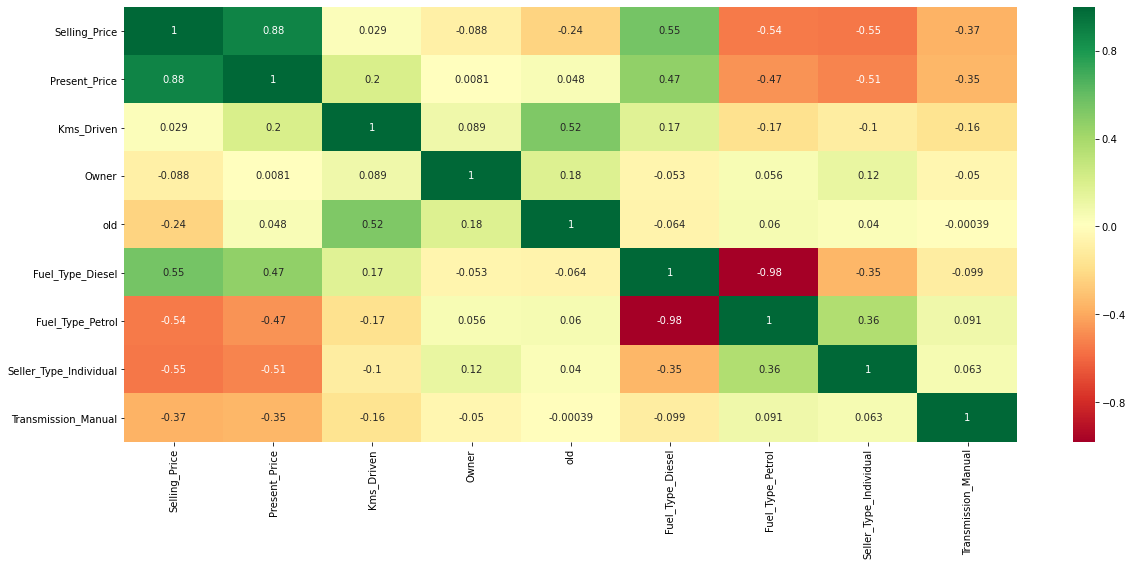

In [12]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [35]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [50]:
x.head()

,Present_Price,Kms_Driven,Owner,old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [51]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model=LinearRegression()

In [61]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
pred=model.predict(X_test)

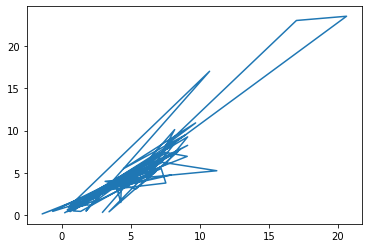

In [63]:
plt.plot(pred,y_test)

In [43]:
import pickle

In [45]:
f1=open('modfile1.pkl','wb')

In [46]:
pickle.dump(lm,f1)

In [47]:
f1.close()

In [68]:
model.predict([[8,1200,0,1,0,1,0,1]])

array([7.25110844])